C:\Users\hanky\AppData\Local\Temp\ipykernel_39020\4269974488.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["Date"] = pd.to_datetime(country_data["Date"])


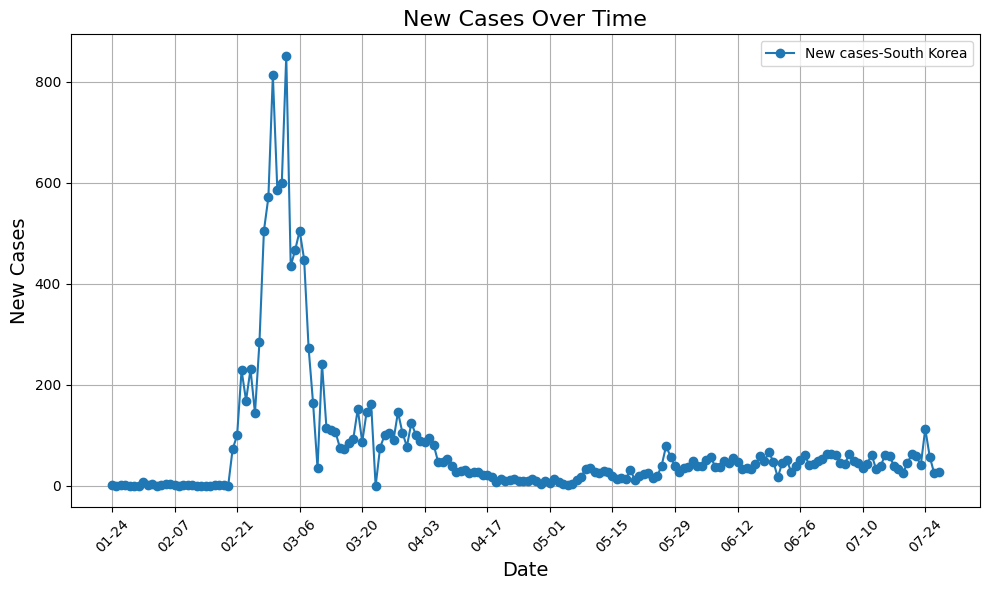

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

path = 'data/country_wise_data.csv'
df = pd.read_csv(path)

country = 'South Korea'
kind = 'New cases' #[Confirmed, Deaths,	Recovered, Active, New cases, New deaths, New recovered]

# Filter rows for the coutry in the "Country/Region" column
country_data = df[df["Country/Region"] == country]
country_data["Date"] = pd.to_datetime(country_data["Date"])

# Find the index of the first non-zero value in the "New cases" column
first_non_zero_index = country_data[country_data[kind] != 0].index[0]
# Slice the DataFrame to start from the first non-zero row
country_data = country_data.loc[first_non_zero_index:]

# Plot Date vs. New cases
plt.figure(figsize=(10, 6))
plt.plot(country_data["Date"], country_data["New cases"], marker='o', linestyle='-', label=f'{kind}-{country}')
plt.xticks(country_data["Date"][::14], country_data["Date"][::14].dt.strftime('%m-%d'), rotation=45)
plt.title("New Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("New Cases", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()